In [1]:
import pandas as pd
import numpy as np

In [3]:
casts = pd.read_csv('cast.csv')
titles = pd.read_csv('titles.csv')

In [4]:
casts.tail()        # NaN -> Not a Number : 값이 없다.


,title,year,name,type,character,n
74996,Mia fora kai ena... moro,2011,Penelope Anastasopoulou,actress,Popi voulkanizater,11.0
74997,The Magician King,2004,Tiannah Anastassiades,actress,Unicycle Race Attendant,NaN
74998,Festival of Lights,2010,Zoe Anastassiou,actress,Guidance Counselor,20.0
74999,Toxic Tutu,2016,Zoe Anastassiou,actress,Demon of Toxicity,NaN
75000,Fugitive Pieces,2007,Anastassia Anastassopoulou,actress,Laundry Girl,25.0


In [5]:
titles.tail()

,title,year
49995,Rebel,1970
49996,Suzanne,1996
49997,Bomba,2013
49998,Aao Jao Ghar Tumhara,1984
49999,Mrs. Munck,1995


In [8]:
casts['n'].isnull().head()  # n 열의 값이 NaN 이면 True 값을 반환.
casts['n'].isnull().tail()
casts['n'].notnull().head() # 열의 값이 NaN 이 아니면 True 값을 반환.

74996    False
74997     True
74998    False
74999     True
75000    False
Name: n, dtype: bool

In [9]:
casts['n'].head()   # n열을 가져옴.

0    31.0
1    22.0
2    10.0
3     NaN
4     NaN
Name: n, dtype: float64

In [11]:
# fillna --> NaN 값을 찾아서 원하는 값으로 변경
# 3번 4번의 NaN 값을 0으로 변경
casts['n'].fillna(0).head()


0    31.0
1    22.0
2    10.0
3     0.0
4     0.0
Name: n, dtype: float64

In [15]:
# NaN 값을 갖는 데이터를 추출하여 NaN 값을 0으로 바꾸고 c_fill 변수에 데이터 프레임 저장.
c_fill = casts[casts['n'].isnull()].fillna(0)

In [14]:
c_fill.head()

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,0.0
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,0.0
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,0.0


In [16]:
t = titles

## 영화 제목이 'Maa' 인 것을 찾아봅시다.

In [17]:
t[t['title'] == 'Maa']

,title,year
38880,Maa,1968


In [20]:
# 제목중에 'Maa'로 시작하는 영화 찾기. str 에 startswith()라는 함수 내장
t[t['title'].str.startswith('Maa ') ]

,title,year
19,Maa Durga Shakti,1999
3046,Maa Aur Mamta,1970
7470,Maa Vaibhav Laxmi,1989
7933,Maa Kande Aaji Puate Pain,2002
17197,Maa al-Khatar,2016
23807,Maa O Mamata,1990
32698,Maa Beti,1986
33290,Maa Mate Shakti De,1990
42463,Maa Dasha Maa,1987
43448,Maa Balaji,1999


In [23]:
t[t['title'].str.startswith('Star ')]

,title,year
508,Star Wars: Episode IX,2019
3286,Star Crossed,2009
4994,Star Trek III: The Search for Spock,1984
5754,Star Paws,2016
6614,Star Cry,2018
7743,"Star Jjangga II: Super Betaman, Majingga V",1990
13644,Star of My Night,1954
14266,Star System,2015
18483,Star Sand,2016
32095,Star Trek: USS PAN,2018


In [24]:
t.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [27]:
t['year']

0        1990
1        1969
2        1993
3        2000
4        2011
         ... 
49995    1970
49996    1996
49997    2013
49998    1984
49999    1995
Name: year, Length: 50000, dtype: int64

In [26]:
t['year'].value_counts()        #value_counts() : 똑같은 값이 몇 번 나오는지.

2016    2363
2017    2138
2015    1849
2014    1701
2013    1609
        ... 
1900       2
1906       1
2024       1
2023       1
1905       1
Name: year, Length: 119, dtype: int64

In [28]:
import matplotlib.pyplot as plt

In [29]:
p = t['year'].value_counts()

In [30]:
type(p)

pandas.core.series.Series

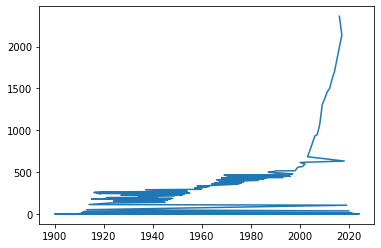

In [33]:
p.plot()
plt.show()

In [35]:
# 연도의 순서에따라 정렬
p.sort_index()

1900     2
1905     1
1906     1
1909     3
1910     5
        ..
2020    37
2021     8
2022     5
2023     1
2024     1
Name: year, Length: 119, dtype: int64

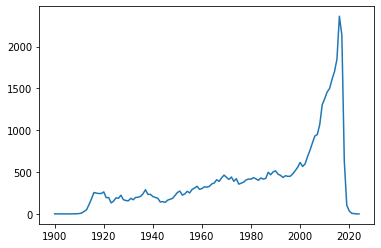

In [37]:
# 정렬된 데이터를 바탕으로 그래프 생성
p.sort_index().plot()
plt.show()

In [39]:
# groupby() : 어떤 데이터를 그룹화 하는 함수
# Column header를 기준으로 그룹을 만들 수 있음
cg = casts.groupby(['year']).size()

In [40]:
type(cg)

pandas.core.series.Series

In [41]:
cg.head()

year
1912      3
1913     10
1914     61
1915     82
1916    116
dtype: int64

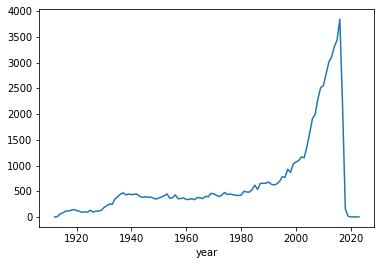

In [42]:
# casts 데이터를 그룹화하여 그래프 그리기
cg.plot()
plt.show()

In [43]:
cg = casts.groupby(['year'])

In [44]:
type(cg)

pandas.core.groupby.generic.DataFrameGroupBy

In [45]:
dir(cg)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_numeric_operations',
 '_agg_examples_doc',
 '_agg_see_also_doc',
 '_aggregate',
 '_aggregate_frame',
 '_aggregate_item_by_item',
 '_aggregate_multiple_funcs',
 '_apply_filter',
 '_apply_to_column_groupbys',
 '_apply_whitelist',
 '_assure_grouper',
 '_bool_agg',
 '_builtin_table',
 '_choose_path',
 '_concat_objects',
 '_constructor',
 '_cumcount_array',
 '_cython_agg_blocks',
 '_cython_agg_general',
 '_cython_table',
 '_cython_transform',
 '_define_paths',
 '_deprecations',
 '_dir_additions',
 '_dir_deletions',
 '_ensure_type'

In [48]:
# 데이터 파일에서 n 값을 추출해서 최대값을 추출
# n 값 : 각 배우의 rating 값
cg.n.max()

year
1912      6.0
1913     14.0
1914     39.0
1915     14.0
1916     35.0
        ...  
2017    620.0
2018     21.0
2019      6.0
2020      NaN
2023      NaN
Name: n, Length: 110, dtype: float64

In [49]:
# n값의 최솟값 찾기
cg.n.min()

year
1912    6.0
1913    1.0
1914    1.0
1915    1.0
1916    1.0
       ... 
2017    1.0
2018    2.0
2019    6.0
2020    NaN
2023    NaN
Name: n, Length: 110, dtype: float64

In [51]:
# 배우 이름이 Aaron Abrams이 출연한 연도별 영화의 수를 구해보기
cf = casts[ casts['name'] == 'Aaron Abrams']

In [52]:
cf

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0
5770,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0
5771,Code 8,2018,Aaron Abrams,actor,Actor,NaN
5772,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.0
5773,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.0
5774,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.0


In [53]:
cf.groupby(['year']).size()

year
2003    2
2004    2
2005    2
2006    1
2007    2
2008    1
2009    2
2011    5
2013    1
2015    2
2017    2
2018    1
dtype: int64

In [54]:
cf2 = cf.groupby(['year']).size()

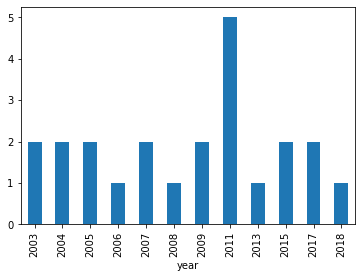

In [56]:
# kind를 설정하면 막대그래프로 변경 가능
cf2.plot(kind = 'bar')
plt.show()

In [58]:
# 두 개의 기준으로 그룹을 묶고, 순서에 따라 분류(year 먼저)
cf3 = cf.groupby(['year', 'title']).size()

In [59]:
cf3

year  title                               
2003  The In-Laws                             1
      The Visual Bible: The Gospel of John    1
2004  Resident Evil: Apocalypse               1
      Siblings                                1
2005  Cinderella Man                          1
      Sabah                                   1
2006  Zoom                                    1
2007  Firehouse Dog                           1
      Young People Fucking                    1
2008  Flash of Genius                         1
2009  Amelia                                  1
      At Home by Myself... with You           1
2011  388 Arletta Avenue                      1
      Jesus Henry Christ                      2
      Take This Waltz                         1
      The Chicago 8                           1
2013  It Was You Charlie                      1
2015  Closet Monster                          1
      Regression                              1
2017  #FromJennifer                          

### Custom filed로 그룹화 하기
 - 내가 만들어 놓은 값을 위주로 그룹화

In [60]:
# year 정보들을 1980도 영화, 1990도 영화, 2000, 2010 과 같은 값을 갖게 변경.
decade = casts['year'] // 10 * 10

In [61]:
decade.head()

0    2010
1    1980
2    2010
3    2010
4    2010
Name: year, dtype: int64

In [62]:
c_dec = casts.groupby(decade).size()

In [63]:
c_dec

year
1910      669
1920     1121
1930     3448
1940     3997
1950     3892
1960     3743
1970     4343
1980     5554
1990     7652
2000    16199
2010    24376
2020        7
dtype: int64

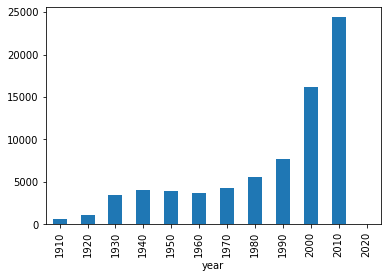

In [64]:
c_dec.plot(kind = 'bar')
plt.show()

In [65]:
casts.groupby(decade).n.min()

year
1910    1.0
1920    1.0
1930    1.0
1940    1.0
1950    1.0
1960    1.0
1970    1.0
1980    1.0
1990    1.0
2000    1.0
2010    1.0
2020    NaN
Name: n, dtype: float64

In [69]:
dt = casts.groupby([decade, 'type']).size()

In [70]:
type(dt)

pandas.core.series.Series

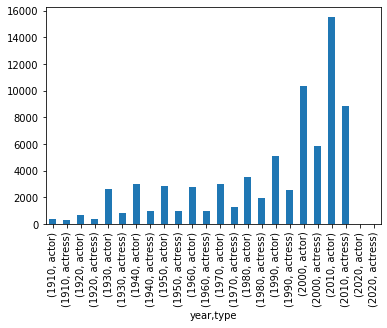

In [72]:
dt.plot(kind = 'bar')
plt.show()

In [74]:
dt2 = casts.groupby(['type', decade]).size()

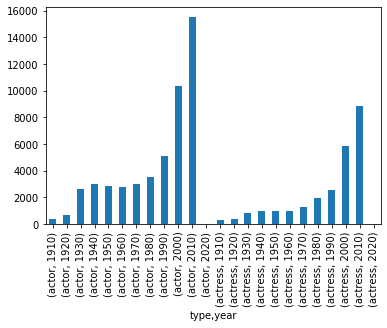

In [76]:
dt2.plot(kind = 'bar')
plt.show()

In [77]:
# 연도가 column index로 바뀌는 데이터 형식으로 변환
dt2.unstack()

year,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
type,,,,,,,,,,,,
actor,384,710,2628,3014,2877,2775,3044,3565,5108,10368,15523,4
actress,285,411,820,983,1015,968,1299,1989,2544,5831,8853,3


In [81]:
# multiple index --> column
dt3 = dt2.unstack()

In [79]:
type(dt3)

pandas.core.frame.DataFrame

In [80]:
type(dt2)

pandas.core.series.Series

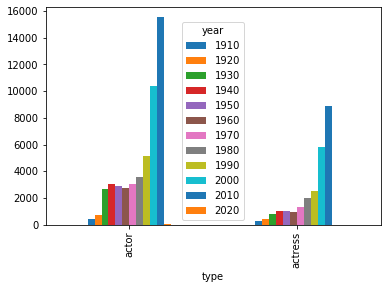

In [82]:
dt3.plot(kind = 'bar')
plt.show()

In [83]:
# level = 0 : 첫번째 인덱스를 선택
dt2.unstack(level = 0)

type,actor,actress
year,,
1910,384,285
1920,710,411
1930,2628,820
1940,3014,983
1950,2877,1015
1960,2775,968
1970,3044,1299
1980,3565,1989
1990,5108,2544


In [84]:
dt4 = dt2.unstack(level = 0)

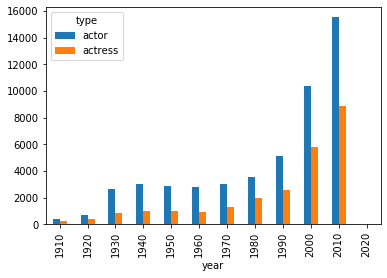

In [85]:
dt4.plot(kind = 'bar')
plt.show()

## Merge

In [86]:
release = pd.read_csv('release_dates.csv')

In [87]:
release.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


In [88]:
c_amelia = casts[casts['title'] == 'Amelia']

In [89]:
c_amelia

,title,year,name,type,character,n
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
23319,Amelia,2009,Jeremy Akerman,actor,Sheriff,19.0


In [90]:
release[ release['title'] == 'Amelia']

,title,year,country,date
20543,Amelia,1966,Mexico,1966-03-10
20544,Amelia,2009,Canada,2009-10-23
20545,Amelia,2009,USA,2009-10-23
20546,Amelia,2009,Australia,2009-11-12
20547,Amelia,2009,Singapore,2009-11-12
20548,Amelia,2009,Ireland,2009-11-13
20549,Amelia,2009,Mexico,2009-11-13
20550,Amelia,2009,UK,2009-11-13
20551,Amelia,2009,Spain,2009-11-20
20552,Amelia,2009,Philippines,2009-12-02


In [91]:
# c_amelia 와 relase 병합
c_amelia.merge(release)

,title,year,name,type,character,n,country,date
0,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Canada,2009-10-23
1,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,USA,2009-10-23
2,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Australia,2009-11-12
3,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Singapore,2009-11-12
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Ireland,2009-11-13
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Mexico,2009-11-13
6,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,UK,2009-11-13
7,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Spain,2009-11-20
8,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Philippines,2009-12-02
9,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Italy,2009-12-23


In [93]:
c = casts[ casts['name'] == 'Aaron Abrams']

In [94]:
c

,title,year,name,type,character,n
5765,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN
5766,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0
5767,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0
5768,At Home by Myself... with You,2009,Aaron Abrams,actor,Guy,2.0
5769,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0
5770,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,1.0
5771,Code 8,2018,Aaron Abrams,actor,Actor,NaN
5772,Firehouse Dog,2007,Aaron Abrams,actor,Policeman at Bridge,32.0
5773,Flash of Genius,2008,Aaron Abrams,actor,Ian Meillor,44.0
5774,It Was You Charlie,2013,Aaron Abrams,actor,Tom,3.0


In [95]:
# 그런데 자기 자신도 목록에 나옴
c.merge(casts, on = ['title', 'year']).head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Aaron Abrams,actor,Ralph Sinclair,NaN
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
3,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Aaron Abrams,actor,Alex,4.0
4,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Aaron Abrams,actor,Slim Gordon,8.0


In [96]:
c_costar = c.merge(casts, on = ['title', 'year'])

In [98]:
# 자기 자신은 예외시킨 뒤 출력
c_costar = c_costar[c_costar['name_x'] != c_costar['name_y']]

In [99]:
c_costar.head()

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
1,#FromJennifer,2017,Aaron Abrams,actor,Ralph Sinclair,NaN,Christian Ackerman,actor,Simon,NaN
2,388 Arletta Avenue,2011,Aaron Abrams,actor,Alex,4.0,Graham Abbey,actor,Officer #2,8.0
5,Amelia,2009,Aaron Abrams,actor,Slim Gordon,8.0,Jeremy Akerman,actor,Sheriff,19.0
8,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Baer Cornerman,38.0
9,Cinderella Man,2005,Aaron Abrams,actor,1928 Fan,67.0,Nick Alachiotis,actor,Undercard Boxer - Feldman,38.0


# index


- 인덱싱를 잘하냐 못하냐에 따라 연산속도가 달라짐

- Google 검색에서 pandas 를 검색하면 6억9천개를 검색하는데에 0.5가 걸림 --> 구글이 인덱싱을 잘하기 떄문에 빠름

In [125]:
# %% time 은 걸린 시간을 나타내줌
%%time
casts[casts['title'] == 'Macbeth']

Wall time: 17 ms


,title,year,name,type,character,n
12868,Macbeth,2015,Darren Adamson,actor,Soldier,NaN
22302,Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
25855,Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
26990,Macbeth,2016,John Albasiny,actor,Doctor,NaN
38090,Macbeth,1948,William Alland,actor,Second Murderer,18.0
40639,Macbeth,1997,Stevie Allen,actor,Murderer,21.0
60543,Macbeth,2014,Moyo Akand?,actress,Witch,NaN
63776,Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [121]:
%%timeit

casts[ casts['title'] == 'Macbeth']

6.19 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [107]:
c = casts.set_index(['title'])

In [108]:
c.head()

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [126]:
%%time
c.loc['Macbeth']

Wall time: 13 ms


,year,name,type,character,n
title,,,,,
Macbeth,2015,Darren Adamson,actor,Soldier,NaN
Macbeth,1916,Spottiswoode Aitken,actor,Duncan,4.0
Macbeth,1948,Robert Alan,actor,Third Murderer,NaN
Macbeth,2016,John Albasiny,actor,Doctor,NaN
Macbeth,1948,William Alland,actor,Second Murderer,18.0
Macbeth,1997,Stevie Allen,actor,Murderer,21.0
Macbeth,2014,Moyo Akand?,actress,Witch,NaN
Macbeth,1916,Mary Alden,actress,Lady Macduff,6.0


In [129]:
%%timeit ## 인덱싱만 바꿔줘도 속도가 더 빨라짐. %%timeit 은 반드시 첫 줄에서 사용.

c.loc['Macbeth']

1.91 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [131]:
type(casts)

pandas.core.frame.DataFrame

In [113]:
cs = casts.set_index(['title']).sort_index()

In [132]:
# set_index를 사용하면 Data의 title값이 row의 index로 설정됨.
cs2 = casts.sort_index().set_index(['title'])

In [136]:
# set_index를 사용하지 않으면 그냥 숫자가 row의 index로 설정.
cs3 = casts.sort_index()

In [135]:
cs2.head(10)

,year,name,type,character,n
title,,,,,
Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
Suuri illusioni,1985,Homo $,actor,Guests,22.0
Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0


In [137]:
cs3.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [138]:
cs.tail(10)

,year,name,type,character,n
title,,,,,
iBoy,2017,Shaquille Ali-Yebuah,actor,Cass,9.0
inter.m@tes,2004,Jojo Alejar,actor,Gus 'Hopeless' Geronimo,6.0
kingdom of ants,2016,Rupak Abdulkadr,actress,Rupak mother,NaN
kingdom of ants,2016,Zayar Abdulla,actor,Hadi,NaN
les aventures d'archives,2016,Buzz Aldrin,actor,Himself,NaN
w Delta z,2007,Barbara Adair,actress,Alice Jackson,8.0
xXx: Return of Xander Cage,2017,Julie Abcede,actor,Catwalk Partiers,84.0
xXx: Return of Xander Cage,2017,Jeimi Abila,actress,Lazarus' Girls,64.0
xXx: Return of Xander Cage,2017,Wayne Ambrose,actor,Choir Members,34.0


In [130]:
%%timeit        ## 속도가 엄청 빨라짐
cs.loc['Macbeth']

156 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


%%time : 이 command가 포함 된 셀이 실행완료 되는데까지 걸리는 시간 출력

%%timeit : 주어진 코드를 여러번 실행시켜본 후에 걸리는 평균시간을 출력. 첫 줄에 사용.



1차(정렬 X)

    %%time
    casts[casts['title'] == 'Macbeth']


    %%timeit
    casts[ casts['title'] == 'Macbeth']     // casts 의 Data Frame 중 title 값이 Macbeth인 행을 시리즈로 출력

    결과 : 6.19 ms ± 205 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
    

2차(set_index를 통해 title 기준으로 1차 정렬)

    c = casts.set_index(['title'])      // casts라는 Data Frame을 Pandas의 set_index()를 통하여 row열을 숫자가 아닌 title 정보로 설정

    %%time
    c.loc['Macbeth']                    // Pandas의 loc[]를 이용하여 'Macbeth'의 index를 갖는 행이 시리즈형식으로 출력.

    %%timeit 
    c.loc['Macbeth']
    
    결과 : 1.91 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


3차(title을 인덱스로 설정 후 sort_index()를 통해 오름차순으로 2차정렬)

    cs = casts.set_index(['title']).sort_index()    // casts라는 Data Frame을 Pandas의 set_index()를 통해 row열을 title로 설정하고 sort_index()를 통하여 title을 오름차순으로 정렬

    %%timeit        
    cs.loc['Macbeth']

    결과 : 156 µs ± 2.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)



--> 정렬된 데이터일 수록 'Macbeth'라는 title을 갖는 data를 더 빨리 찾을 수 있음.

    
    